# Capstone Project - Michelle Giniewicz

Last update: 11.5.2022



## Import all required modules

In [102]:
# core
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn as sklearn


# sql
import sqlalchemy
from sqlalchemy import create_engine
import pymysql

# SKLearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import VarianceThreshold

# models
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


from six import StringIO    # previous (7/21) sklearn.externals.six
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second

## Load Data

In [229]:
# import dataset
dataTrain = pd.read_csv("C:\\Users\\giniewic\\OneDrive - HP Inc\\Documents\\Personal\\UT Data Analytics Cert\\Capstone\\trainingData.csv")
dataValid = pd.read_csv("C:\\Users\\giniewic\\OneDrive - HP Inc\\Documents\\Personal\\UT Data Analytics Cert\\Capstone\\validationData.csv")

In [3]:
dataTrain.shape

(19937, 529)

In [230]:
dataValid.shape

(1111, 529)

In [5]:
dataTrain.head()

WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0     100     100     100     100     100     100     100     100     100   
1     100     100     100     100     100     100     100     100     100   
2     100     100     100     100     100     100     100     -97     100   
3     100     100     100     100     100     100     100     100     100   
4     100     100     100     100     100     100     100     100     100   

   WAP010  ...  WAP520  LONGITUDE      LATITUDE  FLOOR  BUILDINGID  SPACEID  \
0     100  ...     100 -7541.2643  4.864921e+06      2           1      106   
1     100  ...     100 -7536.6212  4.864934e+06      2           1      106   
2     100  ...     100 -7519.1524  4.864950e+06      2           1      103   
3     100  ...     100 -7524.5704  4.864934e+06      2           1      102   
4     100  ...     100 -7632.1436  4.864982e+06      0           0      122   

   RELATIVEPOSITION  USERID  PHONEID   TIMESTAMP  
0                 2       2       23  1371713733  
1                 2       2       23  1371713691  
2                 2       2       23  1371714095  
3                 2       2       23  1371713807  
4                 2      11       13  1369909710  

[5 rows x 529 columns]

In [6]:
dataValid.head()

WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0     100     100     100     100     100     100     100     100     100   
1     100     100     100     100     100     100     100     100     100   
2     100     100     100     100     100     100     100     100     100   
3     100     100     100     100     100     100     100     100     100   
4     100     100     100     100     100     100     100     100     100   

   WAP010  ...  WAP520    LONGITUDE      LATITUDE  FLOOR  BUILDINGID  SPACEID  \
0     100  ...     100 -7515.916799  4.864890e+06      1           1        0   
1     100  ...     100 -7383.867221  4.864840e+06      4           2        0   
2     100  ...     100 -7374.302080  4.864847e+06      4           2        0   
3     100  ...     100 -7365.824883  4.864843e+06      4           2        0   
4     100  ...     100 -7641.499303  4.864922e+06      2           0        0   

   RELATIVEPOSITION  USERID  PHONEID   TIMESTAMP  
0                 0       0        0  1380872703  
1                 0       0       13  1381155054  
2                 0       0       13  1381155095  
3                 0       0       13  1381155138  
4                 0       0        2  1380877774  

[5 rows x 529 columns]

## Preprocess dataset
### Steps to preprocess dataset
* Change col labels
* Sort
* Remove cols 
* Add NaNs and remove
* Remove duplicates
* Use iloc to create new ds
* Write/read csv


### Training Dataset

In [7]:
dataTrain.dtypes

WAP001              int64
WAP002              int64
WAP003              int64
WAP004              int64
WAP005              int64
                    ...  
SPACEID             int64
RELATIVEPOSITION    int64
USERID              int64
PHONEID             int64
TIMESTAMP           int64
Length: 529, dtype: object

In [8]:
# combine location into unique identifier 
dataTrain['Location'] = dataTrain.BUILDINGID.astype(str) + "." + dataTrain.FLOOR.astype(str) + "." + dataTrain.SPACEID.astype(str) + "." + dataTrain.RELATIVEPOSITION.astype(str)

In [9]:
# count rows in each building
dataTrain[(dataTrain['BUILDINGID'] == 0)].shape[0]

5249

In [10]:
dataTrain[(dataTrain['BUILDINGID'] == 1)].shape[0]

5196

In [11]:
dataTrain[(dataTrain['BUILDINGID'] == 2)].shape[0]

9492

In [12]:
# create subset for only building 1
dataTrainB1 = dataTrain[dataTrain['BUILDINGID'] == 1]

In [13]:
print(dataTrainB1)

       WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0         100     100     100     100     100     100     100     100     100   
1         100     100     100     100     100     100     100     100     100   
2         100     100     100     100     100     100     100     -97     100   
3         100     100     100     100     100     100     100     100     100   
5         100     100     100     100     100     100     100     100     100   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
19930     100     100     100     100     100     100     100     100     100   
19932     100     100     100     100     100     100     100     100     100   
19934     100     100     100     100     100     100     100     100     100   
19935     100     100     100     100     100     100     100     100     100   
19936     100     100     100     100     100     100     100     100     100   

       WAP010  ...  LONGITU

In [14]:
# need to keep columns 1-520 (WAP) & 530 (Location)
dataTrainB1 = dataTrainB1.drop(columns=['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'])

In [15]:
#check that only WAP and location columns remain
print(dataTrainB1)

       WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0         100     100     100     100     100     100     100     100     100   
1         100     100     100     100     100     100     100     100     100   
2         100     100     100     100     100     100     100     -97     100   
3         100     100     100     100     100     100     100     100     100   
5         100     100     100     100     100     100     100     100     100   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
19930     100     100     100     100     100     100     100     100     100   
19932     100     100     100     100     100     100     100     100     100   
19934     100     100     100     100     100     100     100     100     100   
19935     100     100     100     100     100     100     100     100     100   
19936     100     100     100     100     100     100     100     100     100   

       WAP010  ...  WAP512 

In [16]:
# convert new location column to factor (category)
dataTrainB1['Location'] = dataTrainB1['Location'].astype('category')

In [17]:
dataTrainB1.dtypes

WAP001         int64
WAP002         int64
WAP003         int64
WAP004         int64
WAP005         int64
              ...   
WAP517         int64
WAP518         int64
WAP519         int64
WAP520         int64
Location    category
Length: 521, dtype: object

In [18]:
# remove columns with zero variance
dataTrainB1NZV = dataTrainB1.loc[:, dataTrainB1.apply(pd.Series.nunique) !=1]

In [19]:
print(dataTrainB1NZV)

       WAP006  WAP008  WAP010  WAP011  WAP012  WAP015  WAP016  WAP017  WAP021  \
0         100     100     100     100     100     100     100     100     100   
1         100     100     100     100     100     100     100     100     100   
2         100     -97     100     100     100     100     100     100     100   
3         100     100     100     100     100     100     100     100     100   
5         100     100     100     100     100     100     100     100     100   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
19930     100     100     100     100     100     -87     -89     100     100   
19932     100     100     100     100     100     -75     -76     100     100   
19934     100     100     100     100     100     -95     -94     100     100   
19935     100     100     100     100     100     -91     -92     100     100   
19936     100     100     100     100     100     100     100     100     100   

       WAP022  ...  WAP446 

In [20]:
dataTrainB1NZV.dtypes

WAP006         int64
WAP008         int64
WAP010         int64
WAP011         int64
WAP012         int64
              ...   
WAP478         int64
WAP489         int64
WAP490         int64
WAP503         int64
Location    category
Length: 208, dtype: object

### Validation Dataset

In [231]:
dataValid.dtypes

WAP001              int64
WAP002              int64
WAP003              int64
WAP004              int64
WAP005              int64
                    ...  
SPACEID             int64
RELATIVEPOSITION    int64
USERID              int64
PHONEID             int64
TIMESTAMP           int64
Length: 529, dtype: object

In [232]:
# combine location into unique identifier 
dataValid['Location'] = dataValid.BUILDINGID.astype(str) + "." + dataValid.FLOOR.astype(str) + "." + dataValid.SPACEID.astype(str) + "." + dataValid.RELATIVEPOSITION.astype(str)

In [234]:
# create subset for only building 1
dataValid = dataValid[dataValid['BUILDINGID'] == 1]

In [235]:
# convert new location column to factor (category)
dataValid['Location'] = dataValid['Location'].astype('category')

In [236]:
# need to keep columns 1-520 (WAP) & 530 (Location)
dataValid = dataValid.drop(columns=['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'])

In [237]:
#check that only WAP and location columns remain
print(dataValid)

      WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0        100     100     100     100     100     100     100     100     100   
16       100     100     100     100     100     100     100     100     100   
20       100     100     100     100     100     100     100     100     100   
24       100     100     100     100     100     100     100     100     100   
25       100     100     100     100     100     100     100     100     100   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1073     100     100     100     100     100     100     100     100     100   
1074     100     100     100     100     100     100     100     100     100   
1075     100     100     100     100     100     100     100     100     100   
1076     100     100     100     100     100     100     100     100     100   
1077     100     100     100     100     100     100     100     100     100   

      WAP010  ...  WAP512  WAP513  WAP5

In [238]:
# Remove same WAPs from training data
dataValidNZV = dataValid.loc[:, dataTrainB1.apply(pd.Series.nunique) !=1]

In [239]:
print(dataValidNZV)

      WAP006  WAP008  WAP010  WAP011  WAP012  WAP015  WAP016  WAP017  WAP021  \
0        100     100     100     100     100     100     100     100     100   
16       100     100     100     100     100     100     100     100     100   
20       100     100     100     100     100     -81     -81     100     100   
24       100     100     100     100     100     100     100     100     100   
25       100     100     100     100     100     100     -81     100     100   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1073     100     100     100     100     100     100     100     100     100   
1074     100     100     100     100     100     100     100     100     100   
1075     100     100     100     100     100     100     100     100     100   
1076     100     100     100     100     100     100     100     100     100   
1077     100     100     100     100     100     100     100     100     100   

      WAP022  ...  WAP446  WAP449  WAP4

In [240]:
dataValidNZV.dtypes

WAP006         int64
WAP008         int64
WAP010         int64
WAP011         int64
WAP012         int64
              ...   
WAP478         int64
WAP489         int64
WAP490         int64
WAP503         int64
Location    category
Length: 208, dtype: object

## Modeling

### Correlation Analysis

In [29]:
corrMat = dataTrainB1NZV.corr().abs()

In [30]:
print(corrMat)

          WAP006    WAP008    WAP010    WAP011    WAP012    WAP015    WAP016  \
WAP006  1.000000  0.082381  0.031102  0.006664  0.020941  0.116783  0.116231   
WAP008  0.082381  1.000000  0.045087  0.051281  0.049380  0.169295  0.168494   
WAP010  0.031102  0.045087  1.000000  0.019361  0.018643  0.076415  0.084450   
WAP011  0.006664  0.051281  0.019361  1.000000  0.542817  0.072695  0.072351   
WAP012  0.020941  0.049380  0.018643  0.542817  1.000000  0.070000  0.069669   
...          ...       ...       ...       ...       ...       ...       ...   
WAP470  0.003307  0.004795  0.001810  0.002059  0.001982  0.006797  0.006765   
WAP478  0.021455  0.117760  0.044459  0.414794  0.382602  0.166936  0.166146   
WAP489  0.012827  0.018595  0.007020  0.007985  0.007688  0.026359  0.026235   
WAP490  0.011468  0.016625  0.006277  0.007139  0.006874  0.077196  0.098328   
WAP503  0.052302  0.102271  0.038611  0.428099  0.360873  0.144978  0.144292   

          WAP017    WAP021    WAP022  .

In [31]:
upper_tri = corrMat.where(np.triu(np.ones(corrMat.shape),k=1).astype(bool))
print(upper_tri)

        WAP006    WAP008    WAP010    WAP011    WAP012    WAP015    WAP016  \
WAP006     NaN  0.082381  0.031102  0.006664  0.020941  0.116783  0.116231   
WAP008     NaN       NaN  0.045087  0.051281  0.049380  0.169295  0.168494   
WAP010     NaN       NaN       NaN  0.019361  0.018643  0.076415  0.084450   
WAP011     NaN       NaN       NaN       NaN  0.542817  0.072695  0.072351   
WAP012     NaN       NaN       NaN       NaN       NaN  0.070000  0.069669   
...        ...       ...       ...       ...       ...       ...       ...   
WAP470     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
WAP478     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
WAP489     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
WAP490     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
WAP503     NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          WAP017    WAP021    WAP022  ...    WAP439    WAP446  

In [32]:
# get column names of those that are >.90 correlation
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(); print(to_drop)


['WAP114', 'WAP116', 'WAP126', 'WAP130', 'WAP135', 'WAP137', 'WAP167', 'WAP177', 'WAP187', 'WAP209', 'WAP413']


In [34]:
# drop columns that are highly correlated 
dataTrainB1corr = dataTrainB1NZV.drop(columns=['WAP114', 'WAP116', 'WAP126', 'WAP130', 'WAP135', 'WAP137', 'WAP167', 'WAP177', 'WAP187', 'WAP209', 'WAP413'])

In [35]:
# check that columns were removed
print(dataTrainB1corr)

       WAP006  WAP008  WAP010  WAP011  WAP012  WAP015  WAP016  WAP017  WAP021  \
0         100     100     100     100     100     100     100     100     100   
1         100     100     100     100     100     100     100     100     100   
2         100     -97     100     100     100     100     100     100     100   
3         100     100     100     100     100     100     100     100     100   
5         100     100     100     100     100     100     100     100     100   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
19930     100     100     100     100     100     -87     -89     100     100   
19932     100     100     100     100     100     -75     -76     100     100   
19934     100     100     100     100     100     -95     -94     100     100   
19935     100     100     100     100     100     -91     -92     100     100   
19936     100     100     100     100     100     100     100     100     100   

       WAP022  ...  WAP446 

In [241]:
#remove same values from dataValidNZV
dataValidcorr = dataValidNZV.drop(columns=['WAP114', 'WAP116', 'WAP126', 'WAP130', 'WAP135', 'WAP137', 'WAP167', 'WAP177', 'WAP187', 'WAP209', 'WAP413'])

In [242]:
# check that columns were removed
print(dataValidcorr)

      WAP006  WAP008  WAP010  WAP011  WAP012  WAP015  WAP016  WAP017  WAP021  \
0        100     100     100     100     100     100     100     100     100   
16       100     100     100     100     100     100     100     100     100   
20       100     100     100     100     100     -81     -81     100     100   
24       100     100     100     100     100     100     100     100     100   
25       100     100     100     100     100     100     -81     100     100   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1073     100     100     100     100     100     100     100     100     100   
1074     100     100     100     100     100     100     100     100     100   
1075     100     100     100     100     100     100     100     100     100   
1076     100     100     100     100     100     100     100     100     100   
1077     100     100     100     100     100     100     100     100     100   

      WAP022  ...  WAP446  WAP449  WAP4

### Train/Test Sets

### OOB dataset

In [52]:
# set independent variables (X) and dependent variable (Y)
Xoob = dataTrainB1.iloc[:,0:520]
print('Summary of feature sample')
Xoob.head()

Summary of feature sample


WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0     100     100     100     100     100     100     100     100     100   
1     100     100     100     100     100     100     100     100     100   
2     100     100     100     100     100     100     100     -97     100   
3     100     100     100     100     100     100     100     100     100   
5     100     100     100     100     100     100     100     100     100   

   WAP010  ...  WAP511  WAP512  WAP513  WAP514  WAP515  WAP516  WAP517  \
0     100  ...     100     100     100     100     100     100     100   
1     100  ...     100     100     100     100     100     100     100   
2     100  ...     100     100     100     100     100     100     100   
3     100  ...     100     100     100     100     100     100     100   
5     100  ...     100     100     100     100     100     100     100   

   WAP518  WAP519  WAP520  
0     100     100     100  
1     100     100     100  
2     100     100     100  
3     100     100     100  
5     100     100     100  

[5 rows x 520 columns]

In [54]:
# dependent variable
Yoob = dataTrainB1.iloc[:,520]
Yoob.head()

0    1.2.106.2
1    1.2.106.2
2    1.2.103.2
3    1.2.102.2
5    1.2.105.2
Name: Location, dtype: category
Categories (243, object): ['1.0.1.1', '1.0.1.2', '1.0.10.1', '1.0.10.2', ..., '1.3.5.1', '1.3.5.2', '1.3.6.1', '1.3.6.2']

#### Split/Train/Test

In [55]:
seed = 123

Xoob_train, Xoob_test, yoob_train, yoob_test = train_test_split(Xoob, Yoob,
                                                        test_size = .25,
                                                        random_state = seed)   
print( Xoob_train.shape )
print( yoob_train.shape )
print( Xoob_test.shape )
print( yoob_test.shape )

(3897, 520)
(3897,)
(1299, 520)
(1299,)


In [56]:
print(Yoob)

0        1.2.106.2
1        1.2.106.2
2        1.2.103.2
3        1.2.102.2
5        1.2.105.2
           ...    
19930      1.3.4.2
19932      1.3.1.2
19934     1.3.13.2
19935    1.3.113.2
19936    1.3.112.2
Name: Location, Length: 5196, dtype: category
Categories (243, object): ['1.0.1.1', '1.0.1.2', '1.0.10.1', '1.0.10.2', ..., '1.3.5.1', '1.3.5.2', '1.3.6.1', '1.3.6.2']


### NZV dataset

In [59]:
# set independent variables (X) and dependent variable (Y)
Xnzv = dataTrainB1NZV.iloc[:,0:207]
print('Summary of feature sample')
Xnzv.head()


Summary of feature sample


WAP006  WAP008  WAP010  WAP011  WAP012  WAP015  WAP016  WAP017  WAP021  \
0     100     100     100     100     100     100     100     100     100   
1     100     100     100     100     100     100     100     100     100   
2     100     -97     100     100     100     100     100     100     100   
3     100     100     100     100     100     100     100     100     100   
5     100     100     100     100     100     100     100     100     100   

   WAP022  ...  WAP439  WAP446  WAP449  WAP454  WAP468  WAP470  WAP478  \
0     100  ...     100     100     100     100     100     100     100   
1     100  ...     100     100     100     100     100     100     100   
2     100  ...     100     100     100     100     100     100     100   
3     100  ...     100     100     100     100     100     100     100   
5     100  ...     100     100     100     100     100     100     100   

   WAP489  WAP490  WAP503  
0     100     100     100  
1     100     100     100  
2     100     100     100  
3     100     100     100  
5     100     100     100  

[5 rows x 207 columns]

In [60]:
# dependent variable
Ynzv = dataTrainB1NZV.iloc[:,207]
Ynzv.head()

0    1.2.106.2
1    1.2.106.2
2    1.2.103.2
3    1.2.102.2
5    1.2.105.2
Name: Location, dtype: category
Categories (243, object): ['1.0.1.1', '1.0.1.2', '1.0.10.1', '1.0.10.2', ..., '1.3.5.1', '1.3.5.2', '1.3.6.1', '1.3.6.2']

#### Split/Train/Test

In [61]:
seed = 123

Xnzv_train, Xnzv_test, ynzv_train, ynzv_test = train_test_split(Xnzv, Ynzv,
                                                        test_size = .25,
                                                        random_state = seed)   
print( Xnzv_train.shape )
print( ynzv_train.shape )
print( Xnzv_test.shape )
print( ynzv_test.shape )

(3897, 207)
(3897,)
(1299, 207)
(1299,)


In [62]:
print(Ynzv)

0        1.2.106.2
1        1.2.106.2
2        1.2.103.2
3        1.2.102.2
5        1.2.105.2
           ...    
19930      1.3.4.2
19932      1.3.1.2
19934     1.3.13.2
19935    1.3.113.2
19936    1.3.112.2
Name: Location, Length: 5196, dtype: category
Categories (243, object): ['1.0.1.1', '1.0.1.2', '1.0.10.1', '1.0.10.2', ..., '1.3.5.1', '1.3.5.2', '1.3.6.1', '1.3.6.2']


### Corr dataset

In [64]:
# set independent variables (X) and dependent variable (Y)
Xcorr = dataTrainB1corr.iloc[:,0:196]
print('Summary of feature sample')
Xcorr.head()

Summary of feature sample


WAP006  WAP008  WAP010  WAP011  WAP012  WAP015  WAP016  WAP017  WAP021  \
0     100     100     100     100     100     100     100     100     100   
1     100     100     100     100     100     100     100     100     100   
2     100     -97     100     100     100     100     100     100     100   
3     100     100     100     100     100     100     100     100     100   
5     100     100     100     100     100     100     100     100     100   

   WAP022  ...  WAP439  WAP446  WAP449  WAP454  WAP468  WAP470  WAP478  \
0     100  ...     100     100     100     100     100     100     100   
1     100  ...     100     100     100     100     100     100     100   
2     100  ...     100     100     100     100     100     100     100   
3     100  ...     100     100     100     100     100     100     100   
5     100  ...     100     100     100     100     100     100     100   

   WAP489  WAP490  WAP503  
0     100     100     100  
1     100     100     100  
2     100     100     100  
3     100     100     100  
5     100     100     100  

[5 rows x 196 columns]

In [65]:
# dependent variable
Ycorr = dataTrainB1corr.iloc[:,196]
Ycorr.head()

0    1.2.106.2
1    1.2.106.2
2    1.2.103.2
3    1.2.102.2
5    1.2.105.2
Name: Location, dtype: category
Categories (243, object): ['1.0.1.1', '1.0.1.2', '1.0.10.1', '1.0.10.2', ..., '1.3.5.1', '1.3.5.2', '1.3.6.1', '1.3.6.2']

#### Split/Train/Test

In [66]:
seed = 123

Xcorr_train, Xcorr_test, ycorr_train, ycorr_test = train_test_split(Xcorr, Ycorr,
                                                        test_size = .25,
                                                        random_state = seed)   
print( Xcorr_train.shape )
print( ycorr_train.shape )
print( Xcorr_test.shape )
print( ycorr_test.shape )

(3897, 196)
(3897,)
(1299, 196)
(1299,)


In [67]:
print(Ycorr)

0        1.2.106.2
1        1.2.106.2
2        1.2.103.2
3        1.2.102.2
5        1.2.105.2
           ...    
19930      1.3.4.2
19932      1.3.1.2
19934     1.3.13.2
19935    1.3.113.2
19936    1.3.112.2
Name: Location, Length: 5196, dtype: category
Categories (243, object): ['1.0.1.1', '1.0.1.2', '1.0.10.1', '1.0.10.2', ..., '1.3.5.1', '1.3.5.2', '1.3.6.1', '1.3.6.2']


###  Create Models

### OOB Dataset

In [123]:
algosOOB = []
algosOOB.append(('Decision Tree_OOB', DecisionTreeClassifier()))
algosOOB.append(('Random Forest_OOB', RandomForestClassifier()))
algosOOB.append(('K-Nearest Neighbors_OOB', KNeighborsClassifier()))

In [124]:
#sorted(sklearn.metrics.SCORERS.keys())

In [193]:
# build models

resultsOOB = []
namesOOB = []

for name, model in algosOOB:
    kfold = KFold(n_splits=3, random_state=seed, shuffle=True)
    result = cross_val_score(model, 
                             Xoob_train, 
                             yoob_train, 
                             cv=kfold,
                             #cv=3)
                            scoring='accuracy')
    namesOOB.append(name)
    resultsOOB.append(result)

In [194]:
# evaluate results

for i in range(len(namesOOB)):
    print(namesOOB[i],resultsOOB[i].mean())

Decision Tree_OOB 0.6274056966897613
Random Forest_OOB 0.8060046189376443
K-Nearest Neighbors_OOB 0.5604311008468051


In [127]:
winsound.Beep(frequency, duration)

### NZV Dataset

In [128]:
algosNZV = []
algosNZV.append(('Decision Tree_NZV', DecisionTreeClassifier()))
algosNZV.append(('Random Forest_NZV', RandomForestClassifier()))
algosNZV.append(('K-Nearest Neighbors_NZV', KNeighborsClassifier()))
#algosNZV.append(('Gradient Boosting_NZV', GradientBoostingClassifier()))

In [129]:
#sorted(sklearn.metrics.SCORERS.keys())

In [195]:
# build models

resultsNZV = []
namesNZV = []

for name, model in algosNZV:
    kfold = KFold(n_splits=3, random_state=seed, shuffle=True)
    result = cross_val_score(model, 
                             Xnzv_train, 
                             ynzv_train, 
                             cv=kfold,
                             #cv=3)
                            scoring='accuracy')
    namesNZV.append(name)
    resultsNZV.append(result)

In [196]:
# evaluate results

for i in range(len(namesNZV)):
    print(namesNZV[i],resultsNZV[i].mean())

Decision Tree_NZV 0.6202206825763408
Random Forest_NZV 0.8119065948165255
K-Nearest Neighbors_NZV 0.5604311008468051


In [132]:
winsound.Beep(frequency, duration)

### Corr Dataset

In [133]:
algosCorr = []
algosCorr.append(('Decision Tree_NZV', DecisionTreeClassifier()))
algosCorr.append(('Random Forest_NZV', RandomForestClassifier()))
algosCorr.append(('K-Nearest Neighbors_NZV', KNeighborsClassifier()))

In [134]:
#sorted(sklearn.metrics.SCORERS.keys())

In [197]:
# build models

resultsCorr = []
namesCorr = []

for name, model in algosCorr:
    kfold = KFold(n_splits=3, random_state=seed, shuffle=True)
    result = cross_val_score(model, 
                             Xcorr_train, 
                             ycorr_train, 
                             cv=kfold,
                             #cv=3)
                            scoring='accuracy')
    namesCorr.append(name)
    resultsCorr.append(result)

In [198]:
# evaluate results

for i in range(len(namesCorr)):
    print(namesCorr[i],resultsCorr[i].mean())

Decision Tree_NZV 0.6209905055170645
Random Forest_NZV 0.8070310495252758
K-Nearest Neighbors_NZV 0.5506800102643058


In [137]:
winsound.Beep(frequency, duration)

### Validate with Test Set

### OOB Dataset

In [199]:
# select best model(s) to tune and validate with the test set
# Decision Tree Model 
DT = DecisionTreeClassifier()
dtModeloob = DT.fit(Xoob_train, yoob_train)
predictionsDToob = dtModeloob.predict(Xoob_test)
print(classification_report(yoob_test, predictionsDToob))
print(confusion_matrix(yoob_test, predictionsDToob))

              precision    recall  f1-score   support

     1.0.1.1       1.00      1.00      1.00         3
     1.0.1.2       0.83      1.00      0.91         5
    1.0.10.1       0.67      1.00      0.80         2
    1.0.10.2       0.80      0.67      0.73         6
   1.0.107.2       0.57      0.80      0.67         5
   1.0.108.2       1.00      0.80      0.89         5
   1.0.110.2       1.00      0.50      0.67         4
   1.0.111.2       0.67      1.00      0.80         2
   1.0.112.2       0.60      0.86      0.71         7
   1.0.113.2       0.75      0.50      0.60         6
   1.0.114.2       0.75      1.00      0.86         6
   1.0.115.2       1.00      1.00      1.00         2
   1.0.116.2       0.86      1.00      0.92         6
   1.0.117.2       1.00      0.80      0.89         5
   1.0.118.2       1.00      1.00      1.00         3
   1.0.119.2       1.00      1.00      1.00         6
   1.0.121.2       0.67      1.00      0.80         2
   1.0.122.2       0.80    

C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\

In [200]:
print(accuracy_score(yoob_test, predictionsDToob))
print(cohen_kappa_score(yoob_test, predictionsDToob))

0.6889915319476521
0.6870389111161073


In [201]:
# Random Forest
RF = RandomForestClassifier()
rfModeloob = RF.fit(Xoob_train, yoob_train)
predictionsRFoob = rfModeloob.predict(Xoob_test)
print(classification_report(yoob_test, predictionsRFoob))
print(confusion_matrix(yoob_test, predictionsRFoob))

              precision    recall  f1-score   support

     1.0.1.1       1.00      1.00      1.00         3
     1.0.1.2       0.83      1.00      0.91         5
    1.0.10.1       1.00      1.00      1.00         2
    1.0.10.2       1.00      0.83      0.91         6
   1.0.107.2       1.00      1.00      1.00         5
   1.0.108.2       0.83      1.00      0.91         5
   1.0.110.2       1.00      0.75      0.86         4
   1.0.111.2       1.00      1.00      1.00         2
   1.0.112.2       0.67      0.86      0.75         7
   1.0.113.2       0.60      0.50      0.55         6
   1.0.114.2       1.00      0.83      0.91         6
   1.0.115.2       1.00      1.00      1.00         2
   1.0.116.2       0.75      1.00      0.86         6
   1.0.117.2       1.00      0.60      0.75         5
   1.0.118.2       1.00      1.00      1.00         3
   1.0.119.2       1.00      1.00      1.00         6
   1.0.121.2       1.00      1.00      1.00         2
   1.0.122.2       1.00    

C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\

In [202]:
print(accuracy_score(yoob_test, predictionsRFoob))
print(cohen_kappa_score(yoob_test, predictionsRFoob))

0.8606620477290223
0.85974491265934


In [203]:
# K Nearest Neighboars
KNN = KNeighborsClassifier()
knnModeloob = KNN.fit(Xoob_train, yoob_train)
predictionsKNNoob = knnModeloob.predict(Xoob_test)
print(classification_report(yoob_test, predictionsKNNoob))
print(confusion_matrix(yoob_test, predictionsKNNoob))

              precision    recall  f1-score   support

     1.0.1.1       0.75      1.00      0.86         3
     1.0.1.2       0.83      1.00      0.91         5
    1.0.10.1       1.00      0.50      0.67         2
    1.0.10.2       1.00      0.67      0.80         6
   1.0.107.2       1.00      0.80      0.89         5
   1.0.108.2       0.75      0.60      0.67         5
   1.0.110.2       0.57      1.00      0.73         4
   1.0.111.2       0.25      0.50      0.33         2
   1.0.112.2       0.40      0.57      0.47         7
   1.0.113.2       0.33      0.17      0.22         6
   1.0.114.2       0.71      0.83      0.77         6
   1.0.115.2       1.00      0.50      0.67         2
   1.0.116.2       0.62      0.83      0.71         6
   1.0.117.2       0.50      0.80      0.62         5
   1.0.118.2       0.67      0.67      0.67         3
   1.0.119.2       1.00      0.83      0.91         6
   1.0.121.2       0.33      0.50      0.40         2
   1.0.122.2       0.20    

C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\

In [204]:
print(accuracy_score(yoob_test, predictionsKNNoob))
print(cohen_kappa_score(yoob_test, predictionsKNNoob))

0.6543494996150885
0.6521522094633521


In [205]:
# Print actual and predctions for best model
# Random Forest
dfoob = Xoob_test.copy()
dfoob['Actual'] = yoob_test
dfoob['Prediction'] = predictionsRFoob
dfoob

WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
1022      100     100     100     100     100     100     100     100     100   
4233      100     100     100     100     100     100     100     100     100   
6945      100     100     100     100     100     100     100     100     100   
15099     100     100     100     100     100     100     100     100     100   
3439      100     100     100     100     100     100     100     100     100   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
12664     100     100     100     100     100     100     100     100     100   
11436     100     100     100     100     100     100     100     -79     100   
15163     100     100     100     100     100     100     100     100     100   
15080     100     100     100     100     100     100     100     100     100   
4545      100     100     100     100     100     100     100     100     100   

       WAP010  ...  WAP513  WAP514  WAP515  WAP516  WAP517  WAP518  WAP519  \
1022      100  ...     100     100     100     100     100     100     100   
4233      100  ...     100     100     100     100     100     100     100   
6945      100  ...     100     100     100     100     100     100     100   
15099     100  ...     100     100     100     100     100     100     100   
3439      100  ...     100     100     100     100     100     100     100   
...       ...  ...     ...     ...     ...     ...     ...     ...     ...   
12664     100  ...     100     100     100     100     100     100     100   
11436     100  ...     100     100     100     100     100     100     100   
15163     100  ...     100     100     100     100     100     100     100   
15080     100  ...     100     100     100     100     100     100     100   
4545      100  ...     100     100     100     100     100     100     100   

       WAP520     Actual  Prediction  
1022      100    1.2.8.2     1.2.8.2  
4233      100  1.0.203.2   1.0.203.2  
6945      100  1.2.203.2   1.2.203.2  
15099     100   1.1.26.2    1.1.26.2  
3439      100  1.0.203.1   1.0.203.1  
...       ...        ...         ...  
12664     100    1.1.8.2    1.1.30.2  
11436     100  1.0.116.2   1.0.116.2  
15163     100  1.0.220.1   1.0.220.1  
15080     100  1.1.201.2   1.1.201.2  
4545      100  1.0.239.2   1.0.239.2  

[1299 rows x 522 columns]

### NZV Dataset

In [206]:
# select best model(s) to tune and validate with the test set
# Decision Tree Model 
DT = DecisionTreeClassifier()
dtModelnzv = DT.fit(Xnzv_train, ynzv_train)
predictionsDTnzv = dtModelnzv.predict(Xnzv_test)
print(classification_report(ynzv_test, predictionsDTnzv))
print(confusion_matrix(ynzv_test, predictionsDTnzv))

              precision    recall  f1-score   support

     1.0.1.1       0.60      1.00      0.75         3
     1.0.1.2       0.83      1.00      0.91         5
    1.0.10.1       1.00      1.00      1.00         2
    1.0.10.2       0.80      0.67      0.73         6
   1.0.107.2       0.50      0.80      0.62         5
   1.0.108.2       1.00      0.80      0.89         5
   1.0.110.2       1.00      0.50      0.67         4
   1.0.111.2       0.67      1.00      0.80         2
   1.0.112.2       0.60      0.86      0.71         7
   1.0.113.2       0.75      0.50      0.60         6
   1.0.114.2       0.67      1.00      0.80         6
   1.0.115.2       1.00      1.00      1.00         2
   1.0.116.2       0.86      1.00      0.92         6
   1.0.117.2       1.00      0.80      0.89         5
   1.0.118.2       1.00      0.67      0.80         3
   1.0.119.2       0.86      1.00      0.92         6
   1.0.121.2       1.00      1.00      1.00         2
   1.0.122.2       0.80    

C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\

In [207]:
print(accuracy_score(ynzv_test, predictionsDTnzv))
print(cohen_kappa_score(ynzv_test, predictionsDTnzv))

0.674364896073903
0.6723155587149223


In [208]:
# Random Forest
RF = RandomForestClassifier()
rfModelnzv = RF.fit(Xnzv_train, ynzv_train)
predictionsRFnzv = rfModelnzv.predict(Xnzv_test)
print(classification_report(ynzv_test, predictionsRFnzv))
print(confusion_matrix(ynzv_test, predictionsRFnzv))

              precision    recall  f1-score   support

     1.0.1.1       1.00      1.00      1.00         3
     1.0.1.2       0.83      1.00      0.91         5
    1.0.10.1       1.00      1.00      1.00         2
    1.0.10.2       1.00      0.83      0.91         6
   1.0.107.2       1.00      0.80      0.89         5
   1.0.108.2       0.83      1.00      0.91         5
   1.0.110.2       1.00      0.75      0.86         4
   1.0.111.2       1.00      1.00      1.00         2
   1.0.112.2       0.67      0.86      0.75         7
   1.0.113.2       0.60      0.50      0.55         6
   1.0.114.2       1.00      0.83      0.91         6
   1.0.115.2       1.00      1.00      1.00         2
   1.0.116.2       0.86      1.00      0.92         6
   1.0.117.2       1.00      0.80      0.89         5
   1.0.118.2       1.00      1.00      1.00         3
   1.0.119.2       1.00      1.00      1.00         6
   1.0.121.2       0.67      1.00      0.80         2
   1.0.122.2       1.00    

C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\

In [209]:
print(accuracy_score(ynzv_test, predictionsRFnzv))
print(cohen_kappa_score(ynzv_test, predictionsRFnzv))

0.8629715165511932
0.8620628353770391


In [210]:
# K Nearest Neighboars
KNN = KNeighborsClassifier()
knnModelnzv = KNN.fit(Xnzv_train, ynzv_train)
predictionsKNNnzv = knnModelnzv.predict(Xnzv_test)
print(classification_report(ynzv_test, predictionsKNNnzv))
print(confusion_matrix(ynzv_test, predictionsKNNnzv))

              precision    recall  f1-score   support

     1.0.1.1       0.75      1.00      0.86         3
     1.0.1.2       0.83      1.00      0.91         5
    1.0.10.1       1.00      0.50      0.67         2
    1.0.10.2       1.00      0.67      0.80         6
   1.0.107.2       1.00      0.80      0.89         5
   1.0.108.2       0.75      0.60      0.67         5
   1.0.110.2       0.57      1.00      0.73         4
   1.0.111.2       0.25      0.50      0.33         2
   1.0.112.2       0.40      0.57      0.47         7
   1.0.113.2       0.33      0.17      0.22         6
   1.0.114.2       0.71      0.83      0.77         6
   1.0.115.2       1.00      0.50      0.67         2
   1.0.116.2       0.62      0.83      0.71         6
   1.0.117.2       0.50      0.80      0.62         5
   1.0.118.2       0.67      0.67      0.67         3
   1.0.119.2       1.00      0.83      0.91         6
   1.0.121.2       0.33      0.50      0.40         2
   1.0.122.2       0.20    

C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\

In [211]:
print(accuracy_score(ynzv_test, predictionsKNNnzv))
print(cohen_kappa_score(ynzv_test, predictionsKNNnzv))

0.6543494996150885
0.6521522094633521


In [212]:
# Print actual and predctions for best model
# Random Forest
dfnzv = Xnzv_test.copy()
dfnzv['Actual'] = ynzv_test
dfnzv['Prediction'] = predictionsRFnzv
dfnzv

WAP006  WAP008  WAP010  WAP011  WAP012  WAP015  WAP016  WAP017  WAP021  \
1022      100     100     100     100     100     -84     -83     100     100   
4233      100     100     100     100     100     100     100     100     100   
6945      100     100     100     100     100     100     100     100     100   
15099     100     100     100     100     100     100     100     100     100   
3439      100     100     100     100     100     100     100     100     100   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
12664     100     100     100     100     100     -82     100     100     100   
11436     100     -79     100     100     100     100     100     100     100   
15163     100     100     100     100     100     100     100     100     100   
15080     100     100     100     100     100     100     100     100     100   
4545      100     100     100     100     100     100     100     100     100   

       WAP022  ...  WAP449  WAP454  WAP468  WAP470  WAP478  WAP489  WAP490  \
1022      100  ...     100     100     100     100     100     100     100   
4233      100  ...     100     100     100     100     100     100     100   
6945      100  ...     100     100     100     100     100     100     100   
15099     100  ...     100     100     100     100     100     100     100   
3439      100  ...     100     100     100     100     100     100     100   
...       ...  ...     ...     ...     ...     ...     ...     ...     ...   
12664     100  ...     100     100     100     100     100     100     100   
11436     100  ...     100     100     100     100     100     100     100   
15163     100  ...     100     100     100     100     100     100     100   
15080     100  ...     100     100     100     100     -85     100     100   
4545      100  ...     100     100     100     100     100     100     100   

       WAP503     Actual  Prediction  
1022      100    1.2.8.2     1.2.9.2  
4233      100  1.0.203.2   1.0.203.2  
6945      100  1.2.203.2   1.2.203.2  
15099     100   1.1.26.2    1.1.26.2  
3439      100  1.0.203.1   1.0.203.1  
...       ...        ...         ...  
12664     100    1.1.8.2    1.1.30.2  
11436     100  1.0.116.2   1.0.116.2  
15163     100  1.0.220.1   1.0.220.1  
15080     100  1.1.201.2   1.1.201.2  
4545      100  1.0.239.2   1.0.239.2  

[1299 rows x 209 columns]

### Corr Dataset

In [213]:
# select best model(s) to tune and validate with the test set
# Decision Tree Model 
DT = DecisionTreeClassifier()
dtModelcorr = DT.fit(Xcorr_train, ycorr_train)
predictionsDTcorr = dtModelcorr.predict(Xcorr_test)
print(classification_report(ycorr_test, predictionsDTcorr))
print(confusion_matrix(ycorr_test, predictionsDTcorr))

              precision    recall  f1-score   support

     1.0.1.1       1.00      1.00      1.00         3
     1.0.1.2       0.83      1.00      0.91         5
    1.0.10.1       0.50      1.00      0.67         2
    1.0.10.2       1.00      0.67      0.80         6
   1.0.107.2       1.00      0.80      0.89         5
   1.0.108.2       0.80      0.80      0.80         5
   1.0.110.2       0.60      0.75      0.67         4
   1.0.111.2       1.00      1.00      1.00         2
   1.0.112.2       0.67      0.86      0.75         7
   1.0.113.2       1.00      0.33      0.50         6
   1.0.114.2       0.75      1.00      0.86         6
   1.0.115.2       1.00      1.00      1.00         2
   1.0.116.2       1.00      1.00      1.00         6
   1.0.117.2       1.00      0.80      0.89         5
   1.0.118.2       0.75      1.00      0.86         3
   1.0.119.2       1.00      1.00      1.00         6
   1.0.121.2       1.00      1.00      1.00         2
   1.0.122.2       1.00    

C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\

In [156]:
print(accuracy_score(ycorr_test, predictionsDTcorr))
print(cohen_kappa_score(ycorr_test, predictionsDTcorr))

0.6589684372594303
0.6568406226109731


In [214]:
# Random Forest
RF = RandomForestClassifier()
rfModelcorr = RF.fit(Xcorr_train, ycorr_train)
predictionsRFcorr = rfModelcorr.predict(Xcorr_test)
print(classification_report(ycorr_test, predictionsRFcorr))
print(confusion_matrix(ycorr_test, predictionsRFcorr))

              precision    recall  f1-score   support

     1.0.1.1       1.00      1.00      1.00         3
     1.0.1.2       0.83      1.00      0.91         5
    1.0.10.1       1.00      1.00      1.00         2
    1.0.10.2       1.00      0.83      0.91         6
   1.0.107.2       1.00      0.80      0.89         5
   1.0.108.2       1.00      0.80      0.89         5
   1.0.110.2       1.00      0.75      0.86         4
   1.0.111.2       0.67      1.00      0.80         2
   1.0.112.2       0.70      1.00      0.82         7
   1.0.113.2       0.75      0.50      0.60         6
   1.0.114.2       0.86      1.00      0.92         6
   1.0.115.2       1.00      1.00      1.00         2
   1.0.116.2       1.00      1.00      1.00         6
   1.0.117.2       1.00      1.00      1.00         5
   1.0.118.2       1.00      1.00      1.00         3
   1.0.119.2       1.00      1.00      1.00         6
   1.0.121.2       0.67      1.00      0.80         2
   1.0.122.2       1.00    

C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\

In [215]:
print(accuracy_score(ycorr_test, predictionsRFcorr))
print(cohen_kappa_score(ycorr_test, predictionsRFcorr))

0.8637413394919169
0.8628511812766151


In [216]:
# K Nearest Neighboars
KNN = KNeighborsClassifier()
knnModelcorr = KNN.fit(Xcorr_train, ycorr_train)
predictionsKNNcorr = knnModelcorr.predict(Xcorr_test)
print(classification_report(ycorr_test, predictionsKNNcorr))
print(confusion_matrix(ycorr_test, predictionsKNNcorr))

              precision    recall  f1-score   support

     1.0.1.1       0.75      1.00      0.86         3
     1.0.1.2       0.83      1.00      0.91         5
    1.0.10.1       1.00      0.50      0.67         2
    1.0.10.2       1.00      0.67      0.80         6
   1.0.107.2       1.00      0.80      0.89         5
   1.0.108.2       1.00      0.20      0.33         5
   1.0.110.2       0.67      1.00      0.80         4
   1.0.111.2       0.17      0.50      0.25         2
   1.0.112.2       0.33      0.29      0.31         7
   1.0.113.2       0.33      0.17      0.22         6
   1.0.114.2       0.55      1.00      0.71         6
   1.0.115.2       1.00      0.50      0.67         2
   1.0.116.2       0.60      0.50      0.55         6
   1.0.117.2       0.50      1.00      0.67         5
   1.0.118.2       0.50      0.67      0.57         3
   1.0.119.2       0.83      0.83      0.83         6
   1.0.121.2       0.33      0.50      0.40         2
   1.0.122.2       0.18    

C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giniewic\Anaconda3\lib\site-packages\sklearn\

In [217]:
print(accuracy_score(ycorr_test, predictionsKNNcorr))
print(cohen_kappa_score(ycorr_test, predictionsKNNcorr))

0.6327944572748267
0.6304729246183207


In [218]:
# Print actual and predctions for best model
# Random Forest
dfcorr = Xcorr_test.copy()
dfcorr['Actual'] = ycorr_test
dfcorr['Prediction'] = predictionsRFcorr
dfcorr

WAP006  WAP008  WAP010  WAP011  WAP012  WAP015  WAP016  WAP017  WAP021  \
1022      100     100     100     100     100     -84     -83     100     100   
4233      100     100     100     100     100     100     100     100     100   
6945      100     100     100     100     100     100     100     100     100   
15099     100     100     100     100     100     100     100     100     100   
3439      100     100     100     100     100     100     100     100     100   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
12664     100     100     100     100     100     -82     100     100     100   
11436     100     -79     100     100     100     100     100     100     100   
15163     100     100     100     100     100     100     100     100     100   
15080     100     100     100     100     100     100     100     100     100   
4545      100     100     100     100     100     100     100     100     100   

       WAP022  ...  WAP449  WAP454  WAP468  WAP470  WAP478  WAP489  WAP490  \
1022      100  ...     100     100     100     100     100     100     100   
4233      100  ...     100     100     100     100     100     100     100   
6945      100  ...     100     100     100     100     100     100     100   
15099     100  ...     100     100     100     100     100     100     100   
3439      100  ...     100     100     100     100     100     100     100   
...       ...  ...     ...     ...     ...     ...     ...     ...     ...   
12664     100  ...     100     100     100     100     100     100     100   
11436     100  ...     100     100     100     100     100     100     100   
15163     100  ...     100     100     100     100     100     100     100   
15080     100  ...     100     100     100     100     -85     100     100   
4545      100  ...     100     100     100     100     100     100     100   

       WAP503     Actual  Prediction  
1022      100    1.2.8.2     1.2.9.2  
4233      100  1.0.203.2   1.0.203.2  
6945      100  1.2.203.2   1.2.203.2  
15099     100   1.1.26.2    1.1.26.2  
3439      100  1.0.203.1   1.0.203.1  
...       ...        ...         ...  
12664     100    1.1.8.2    1.1.30.2  
11436     100  1.0.116.2   1.0.116.2  
15163     100  1.0.220.1   1.0.220.1  
15080     100  1.1.201.2   1.1.201.2  
4545      100  1.0.239.2   1.0.239.2  

[1299 rows x 198 columns]

### Create dataset to plot accuracy and kappa scores

In [219]:
# initialize list of lists
dataScores = [['DT - OOB', 0.6889915319476521, 0.6870389111161073],
              ['RF - OOB', 0.8606620477290223, 0.85974491265934],
              ['KNN - OOB', 0.6543494996150885, 0.6521522094633521],
              ['DT - NZV', 0.674364896073903, 0.6723155587149223],
              ['RF - NZV', 0.8629715165511932, 0.8620628353770391],
              ['KNN - NZV', 0.6543494996150885, 0.6521522094633521],
              ['DT - Corr', 0.6589684372594303, 0.6568406226109731],
              ['RF - Corr', 0.8637413394919169, 0.8628511812766151],
              ['KNN - Corr', 0.6327944572748267, 0.6304729246183207]              
             ]

In [220]:
# create dataframe
dataModels = pd.DataFrame(dataScores, columns=['Model', 'Accuracy', 'Kappa'])
dataModels

Model  Accuracy     Kappa
0    DT - OOB  0.688992  0.687039
1    RF - OOB  0.860662  0.859745
2   KNN - OOB  0.654349  0.652152
3    DT - NZV  0.674365  0.672316
4    RF - NZV  0.862972  0.862063
5   KNN - NZV  0.654349  0.652152
6   DT - Corr  0.658968  0.656841
7   RF - Corr  0.863741  0.862851
8  KNN - Corr  0.632794  0.630473

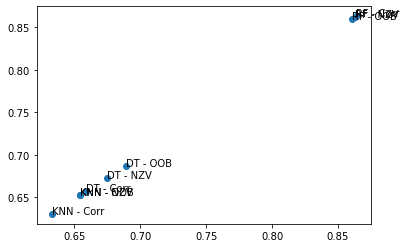

In [221]:
# create plot
x = dataModels['Accuracy']
y = dataModels['Kappa']
labels = dataModels['Model']
#plt.scatter(x,y)
#plt.legend(labels, loc = "lower right")
#plt.show()
fig, ax = plt.subplots()
ax.scatter(x,y)

for i, txt in enumerate(labels):
    ax.annotate(txt, (x[i], y[i]))

### RANDOM FOREST - CORR IS THE BEST MODEL SINCE IT HAS THE HIGHEST ACCURACY & KAPPA SCORES ###

## Use Model with Validation Dataset

In [243]:
# set independent variables (X) and dependent variable (Y) for Validation set
validX = dataValidcorr.iloc[:,0:196]
print('Summary of feature sample')
validX.head()
#print(validX.shape)
print(validX)

Summary of feature sample
      WAP006  WAP008  WAP010  WAP011  WAP012  WAP015  WAP016  WAP017  WAP021  \
0        100     100     100     100     100     100     100     100     100   
16       100     100     100     100     100     100     100     100     100   
20       100     100     100     100     100     -81     -81     100     100   
24       100     100     100     100     100     100     100     100     100   
25       100     100     100     100     100     100     -81     100     100   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1073     100     100     100     100     100     100     100     100     100   
1074     100     100     100     100     100     100     100     100     100   
1075     100     100     100     100     100     100     100     100     100   
1076     100     100     100     100     100     100     100     100     100   
1077     100     100     100     100     100     100     100     100     100   

      WAP022 

In [244]:
# dependent variable
validY = dataValidcorr.iloc[:,196]
validY.head()
#print(validY.shape)i
print(validY)

0       1.1.0.0
16      1.3.0.0
20      1.3.0.0
24      1.1.0.0
25      1.1.0.0
         ...   
1073    1.3.0.0
1074    1.3.0.0
1075    1.3.0.0
1076    1.3.0.0
1077    1.3.0.0
Name: Location, Length: 307, dtype: category
Categories (4, object): ['1.0.0.0', '1.1.0.0', '1.2.0.0', '1.3.0.0']


In [245]:
predictionsValidRF = rfModelcorr.predict(validX)
print(accuracy_score(validY, predictionsValidRF))
print(cohen_kappa_score(validY, predictionsValidRF))

0.0
0.0


In [246]:
print(predictionsValidRF.tolist())

['1.3.102.2', '1.3.112.2', '1.2.110.2', '1.1.108.2', '1.1.108.2', '1.2.101.2', '1.2.105.2', '1.2.105.2', '1.2.103.2', '1.3.202.2', '1.3.206.2', '1.3.216.2', '1.3.216.2', '1.3.216.2', '1.3.203.2', '1.3.203.2', '1.3.101.2', '1.3.101.2', '1.3.101.2', '1.3.103.2', '1.3.105.2', '1.0.10.1', '1.1.106.1', '1.1.106.1', '1.1.102.1', '1.1.102.1', '1.0.10.1', '1.0.10.1', '1.2.2.2', '1.2.8.2', '1.2.8.2', '1.2.7.2', '1.2.7.2', '1.2.16.2', '1.3.107.2', '1.3.4.2', '1.2.7.2', '1.3.6.2', '1.3.4.2', '1.2.28.2', '1.1.106.2', '1.1.103.2', '1.1.102.1', '1.1.103.2', '1.1.103.1', '1.1.103.1', '1.1.104.1', '1.1.102.2', '1.1.105.2', '1.1.106.2', '1.1.106.2', '1.1.117.2', '1.1.206.2', '1.1.202.1', '1.1.202.1', '1.1.204.2', '1.0.216.1', '1.0.245.2', '1.0.9.2', '1.0.116.2', '1.0.108.2', '1.1.110.1', '1.1.110.1', '1.2.112.2', '1.0.108.2', '1.1.107.2', '1.1.110.2', '1.1.110.1', '1.0.115.2', '1.1.107.2', '1.1.108.2', '1.2.2.2', '1.1.106.2', '1.1.110.1', '1.1.106.2', '1.1.109.1', '1.1.108.2', '1.1.105.1', '1.0.115.2',

In [247]:
dataValidcorr.dtypes

WAP006         int64
WAP008         int64
WAP010         int64
WAP011         int64
WAP012         int64
              ...   
WAP478         int64
WAP489         int64
WAP490         int64
WAP503         int64
Location    category
Length: 197, dtype: object

In [248]:
df = validX.copy()
df['Actual'] = validY
df['Prediction'] = predictionsValidRF
df

WAP006  WAP008  WAP010  WAP011  WAP012  WAP015  WAP016  WAP017  WAP021  \
0        100     100     100     100     100     100     100     100     100   
16       100     100     100     100     100     100     100     100     100   
20       100     100     100     100     100     -81     -81     100     100   
24       100     100     100     100     100     100     100     100     100   
25       100     100     100     100     100     100     -81     100     100   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1073     100     100     100     100     100     100     100     100     100   
1074     100     100     100     100     100     100     100     100     100   
1075     100     100     100     100     100     100     100     100     100   
1076     100     100     100     100     100     100     100     100     100   
1077     100     100     100     100     100     100     100     100     100   

      WAP022  ...  WAP449  WAP454  WAP468  WAP470  WAP478  WAP489  WAP490  \
0        100  ...     100     100     100     100     100     100     100   
16       100  ...     100     100     100     100     100     100     100   
20       100  ...     100     100     100     100     100     100     100   
24       100  ...     100     100     100     100     100     100     100   
25       100  ...     100     100     100     100     100     100     100   
...      ...  ...     ...     ...     ...     ...     ...     ...     ...   
1073     100  ...     100     100     100     100     100     100     100   
1074     100  ...     100     100     100     100     100     100     100   
1075     100  ...     100     100     100     100     100     100     100   
1076     100  ...     100     100     100     100     100     100     100   
1077     100  ...     100     100     100     100     100     100     100   

      WAP503   Actual  Prediction  
0        100  1.1.0.0   1.3.102.2  
16       100  1.3.0.0   1.3.112.2  
20       100  1.3.0.0   1.2.110.2  
24       100  1.1.0.0   1.1.108.2  
25       100  1.1.0.0   1.1.108.2  
...      ...      ...         ...  
1073     100  1.3.0.0   1.3.103.1  
1074     100  1.3.0.0   1.3.103.1  
1075     100  1.3.0.0   1.3.112.2  
1076     100  1.3.0.0   1.3.108.2  
1077     100  1.3.0.0   1.3.107.2  

[307 rows x 198 columns]